Dissertation - Biomedical Engineering

2020/2021

Ana Catarina Monteiro Magalhães

Sensors - Zebrafish vital signs and water temperature data analysis

File: Data_analyze.ipynb

Date: 06-09-2021

Description: This notebook contains the analysis of the data obtained by the heartbeat sensors and the thermistor.  


### Imports

In [1]:
import scipy
import serial
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.signal as signal
from scipy.signal import find_peaks
from scipy import fftpack
from scipy.optimize import curve_fit
from scipy.stats import norm
import statistics

Information of the zebrafish and the section of the data

In [2]:
trial = 3
fish_number = 2
bn = 210
fn = 235
# time at which the data started to be saved
init = 10.45
ROI = 'heart'

In [3]:
if trial == 2:
    # Sampling period
    ta = 0.05
    # Cutoff frequency
    Wn = [0.01, 0.4] 
if trial == 3:
    # Sampling period
    ta = 0.01 
    # Cutoff frequency
    Wn = [0.002, 0.08]   
print(ta)
print(Wn)

0.01
[0.002, 0.08]


# Sensors 

In [4]:
# Files from trial 2
A2_1 = "20210624-143847-peixe1.csv"
A2_2 = "20210624-145602-peixe2.csv"
A2_3 = "20210624-151249-peixe3.csv"
A2_4 = "20210624-155357-peixe4.csv"
A2_5 = "20210624-153033-peixe5.csv"

# Files from trial 3
A3_1 = "20210714-150307_peixe1.csv"
A3_2 = "20210714-152517_peixe2.csv"
A3_3 = "20210714-160833_peixe3.2.csv"
A3_4 = "20210714-162911_peixe4.csv"

In [5]:
# Read csv data
data=pd.read_csv(A3_2)
data.columns = ['Tempo','Amplitude', 'Temperatura']
print(data)

begin= int(bn/0.01)- int(init/0.01)
finish = int(fn/0.01)- int(init/0.01)

          Tempo  Amplitude  Temperatura
0         11.03       6393        24.38
1         11.04       6921        24.38
2         11.05       6640        24.28
3         11.06       6458        24.28
4         11.07       6499        24.38
...         ...        ...          ...
139583  1407.92      12265        24.18
139584  1407.93      11210        24.08
139585  1407.94       8622        24.18
139586  1407.95       3805        24.28
139587  1407.96          0        24.18

[139588 rows x 3 columns]


### Data Filtering

In [6]:
#Design the Butterworth filter
# Filter order
N  = 2      

# Application of the filter to the data
B, A = signal.butter(N, Wn,'bandpass', output='ba')
smooth_data = signal.filtfilt(B,A, data['Amplitude'][begin:finish])

## Find_peaks (sensors)

In [7]:
smooth_data = smooth_data/max(smooth_data)
peaks, _ = find_peaks(smooth_data, height = -0.5, distance = 30, threshold = 0.00001) #retorna os indices dos picos 
print(len(peaks))

44


#### Peaks time

In [8]:
tt = list(data['Tempo'][begin:finish])
td = []
for m in range(len(peaks)):
    u = peaks[m]
    td.append(tt[u])
print(td)

[210.62, 211.03, 211.92, 212.37, 213.03, 213.75, 214.15, 214.92, 215.75, 216.18, 217.14, 217.76, 218.61, 219.05, 219.57, 220.95, 221.27, 221.71, 222.35, 222.65, 223.3, 224.07, 224.61, 225.46, 225.89, 226.49, 226.83, 227.35, 227.73, 228.04, 228.41, 229.09, 229.49, 229.88, 230.42, 230.92, 231.67, 232.11, 232.66, 233.09, 233.74, 234.35, 234.83, 235.42]


# Video 

In [9]:
# Open the document to be analyzed 
f = open("Mean-peixe2-210-235.txt", "r")
s = f.read()
f.close()

avg = list(s.split('\n'))
frame = []
time = []
video_dur = fn-bn

nr_frames = len(avg)-1
a = video_dur/nr_frames


# Sampling frequency
fps = 30 

for n in range(1,nr_frames+1):
    frame.append(n)
    time.append(a*n + bn)
    avg[n-1] = float(avg[n-1])

avg =np.array(avg[:-1])

m = avg[:] # List of the intensity pixel values of the selected ROI
t= time[:]

In [10]:
#Design the Butterworth filter
N1  = 2                 # Filter order
Wn1 = [0.02, 0.2]       # Cutoff frequency
B1, A1 = signal.butter(N1, Wn1,'bandpass', output='ba')
smooth_data1 = signal.filtfilt(B1,A1, m)

## Find_peaks (video)

In [11]:
peaks1, _ = find_peaks(smooth_data1, height =-2, distance = 7, threshold = 0.00001) #retorna os indices dos picos 
print(len(peaks1))

40


In [12]:
td1 = []
for m in range(len(peaks1)):
    u = peaks1[m]
    td1.append(t[u])
print(td1)

[210.3716216216216, 211.0810810810811, 211.82432432432432, 212.19594594594594, 212.73648648648648, 213.61486486486487, 214.15540540540542, 214.59459459459458, 214.89864864864865, 215.67567567567568, 215.94594594594594, 216.35135135135135, 217.26351351351352, 217.80405405405406, 218.41216216216216, 218.88513513513513, 219.42567567567568, 220.27027027027026, 221.0810810810811, 221.58783783783784, 221.8918918918919, 222.60135135135135, 222.90540540540542, 223.17567567567568, 224.05405405405406, 224.3918918918919, 224.72972972972974, 225.54054054054055, 225.8108108108108, 226.21621621621622, 227.02702702702703, 228.34459459459458, 229.29054054054055, 229.76351351351352, 230.40540540540542, 230.94594594594594, 231.95945945945945, 232.5, 233.27702702702703, 234.3918918918919]


### Plot of the sensors signal and the video signal

<IPython.core.display.Javascript object>


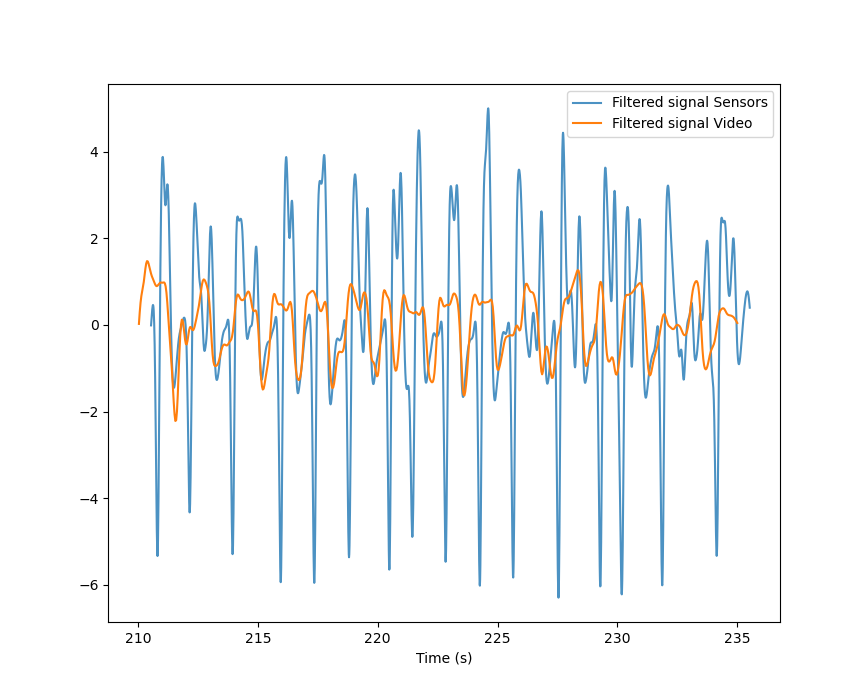

In [18]:
plt.plot(data['Tempo'][begin:finish],smooth_data*5,'k-', color = 'C0', label='Filtered signal Sensors', alpha = 0.8)
plt.plot(t,smooth_data1,'-',color = 'C1', label='Filtered signal Video', alpha = 1)
plt.legend(loc = 'best')
plt.xlabel('Time (s)')
plt.show()

### Dispersion of the relative position of the video and sensors peaks

<IPython.core.display.Javascript object>


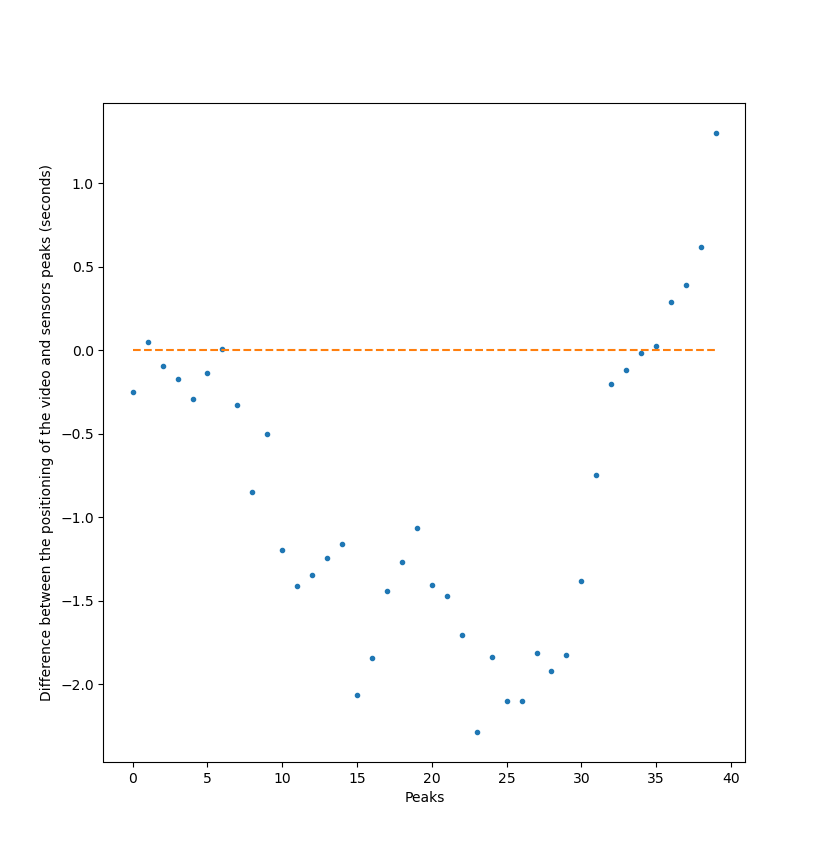

Text(0, 0.5, 'Difference between the positioning of the video and sensors peaks (seconds)')

In [19]:
dif = []
for p in range(len(td1)):
    dif.append(td1[p]-td[p])
    
plt.plot(dif,'.', color="C0")
plt.plot(np.zeros_like(dif), "--", color="C1")
plt.xlabel('Peaks')
plt.ylabel('Difference between the positioning of the video and sensors peaks (seconds)')

<IPython.core.display.Javascript object>


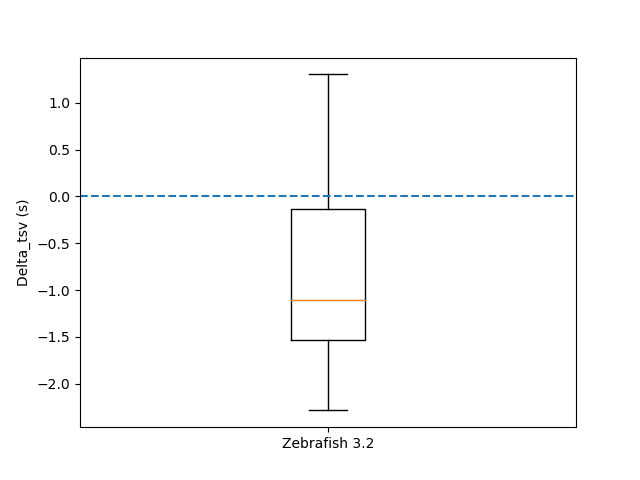

Text(0, 0.5, 'Delta_tsv (s)')

In [20]:
plt.boxplot(dif, positions=[0.5])
plt.xticks([0.5], ['Zebrafish 3.2'])

lst = [0]*2
plt.plot(lst, "--", color="C0")
plt.ylabel ('Delta_tsv (s)')